<a href="https://colab.research.google.com/github/swago72/Car-Insurance-Claim-Prediction/blob/main/Rakshit_Mathur_HW5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

# Suppress specific warning type
warnings.filterwarnings("ignore")

In [2]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')

  # Install the latest version of torchtext library quietly without showing output
  !pip install torchtext -qq
  !pip install transformers evaluate wandb datasets accelerate -U -qq ## NEW LINES ##
  basepath = '/content/drive/MyDrive/data/'
else:
  basepath = '/home/harpreet/Insync/google_drive_shaannorr/data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import necessary libraries
import pandas as pd

# Importing PyTorch library for tensor computations and neural network modules
import torch
import torch.nn as nn


# For working with textual data vocabularies and for displaying model summaries
from torchtext.vocab import vocab

# General-purpose Python libraries for random number generation and numerical operations
import random
import numpy as np

# Utilities for efficient serialization/deserialization of Python objects and for element tallying
import joblib
from collections import Counter

# For creating lightweight attribute classes and for partial function application
from functools import partial

# For filesystem path handling, generating and displaying confusion matrices, and date-time manipulations
from pathlib import Path
from sklearn.metrics import confusion_matrix
from datetime import datetime

# For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Printing: Import the pprint function from the pprint module for formatted output of text
from pprint import pprint

In [4]:
# Importing PyTorch library for tensor computations and neural network modules
import torch
import torch.nn as nn

# For working with textual data vocabularies and for displaying model summaries
from torchtext.vocab import vocab

# General-purpose Python libraries for random number generation and numerical operations
import random
import numpy as np

# Utilities for efficient serialization/deserialization of Python objects and for element tallying
import joblib
from collections import Counter

# For creating lightweight attribute classes and for partial function application
from functools import partial

# For filesystem path handling, generating and displaying confusion matrices, and date-time manipulations
from pathlib import Path
from sklearn.metrics import confusion_matrix
from datetime import datetime

# For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

### NEW ##########################
# imports from Huggingface ecosystem
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import PreTrainedModel, PretrainedConfig
from transformers import TrainingArguments, Trainer
from datasets import Dataset
import evaluate

# wandb library
import wandb

In [5]:
#  # Install the latest version of torchtext library quietly without showing output
# !pip install torchtext -qq
# !pip install transformers evaluate wandb datasets accelerate -U -qq ## NEW LINES ##

In [6]:
pip install torchinfo

In [7]:
from torchinfo import summary

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/data/datasets/HW 5

/content/drive/MyDrive/data/datasets/HW 5


In [10]:
df = pd.read_csv('train.csv')

In [11]:
df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


In [12]:
basepath = '/content/drive/MyDrive'

# Set the base folder path using the Path class for better path handling
base_folder = Path(basepath)

# Define the data folder path by appending the relative path to the base folder
# This is where the data files will be stored
data_folder = base_folder / 'NLP_Data'

# Define the model folder path for saving trained models
# This path points to a specific folder designated for NLP models related to the IMDb dataset
model_folder = base_folder / 'models/imdb/pretrain'

In [13]:
# Create the model folder directory. If it already exists, do nothing.
# The 'parents=True' argument ensures that all parent directories are created if they don't exist.
model_folder.mkdir(exist_ok=True, parents=True)

# Create the data folder directory in a similar manner.
data_folder.mkdir(exist_ok=True, parents=True)


In [14]:
from sklearn.model_selection import train_test_split

X_train_file = data_folder / 'train (1).csv'
X_test_file = data_folder / 'test (1).csv'

# Load train data from train.csv
train_df = pd.read_csv(X_train_file)

# Split train data into features (X_train) and labels (y_train)
X_train = train_df["Tweet"]
y_train = train_df.drop(columns=["ID", "Tweet"])

# Split train data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load test data from test.csv
test_df = pd.read_csv(X_test_file)

# Split test data into features (X_test) and labels (y_test)
X_test = test_df["Tweet"]
y_test = test_df.drop(columns=["ID", "Tweet"])



In [15]:
# Replace 'NONE' values with 0 in y_test
y_test = y_test.replace('NONE', 0)

y_test

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3254,0,0,0,0,0,0,0,0,0,0,0
3255,0,0,0,0,0,0,0,0,0,0,0
3256,0,0,0,0,0,0,0,0,0,0,0
3257,0,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup
import re
import spacy
import numpy as np
from nltk.stem.porter import PorterStemmer
import os

class SpacyPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, model, *, batch_size = 64, lemmatize=True, lower=True, remove_stop=True,
                remove_punct=True, remove_email=True, remove_url=True, remove_num=False, stemming = False,
                add_user_mention_prefix=True, remove_hashtag_prefix=False, basic_clean_only=False):

        self.model = model
        self.batch_size = batch_size
        self.remove_stop = remove_stop
        self.remove_punct = remove_punct
        self.remove_num = remove_num
        self.remove_url = remove_url
        self.remove_email = remove_email
        self.lower = lower
        self.add_user_mention_prefix = add_user_mention_prefix
        self.remove_hashtag_prefix = remove_hashtag_prefix
        self.basic_clean_only = basic_clean_only

        if lemmatize and stemming:
            raise ValueError("Only one of 'lemmatize' and 'stemming' can be True.")

        # Validate basic_clean_only option
        if self.basic_clean_only and (lemmatize or lower or remove_stop or remove_punct or remove_num or stemming or
                                      add_user_mention_prefix or remove_hashtag_prefix):
            raise ValueError("If 'basic_clean_only' is set to True, other processing options must be set to False.")

        # Assign lemmatize and stemming

        self.lemmatize = lemmatize
        self.stemming = stemming

    def basic_clean(self, text):
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        text = re.sub(r'[\n\r]', ' ', text)
        return text.strip()

    def spacy_preprocessor(self, texts):
        final_result = []
        nlp = spacy.load(self.model)

        # Disable unnecessary pipelines in spaCy model
        if self.lemmatize:
            # Disable parser and named entity recognition
            disabled_pipes = ['parser', 'ner']
        else:
            # Disable tagger, parser, attribute ruler, lemmatizer and named entity recognition
            disabled_pipes = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

        with nlp.select_pipes(disable=disabled_pipes):
          # Modify tokenizer behavior based on user_mention_prefix and hashtag_prefix settings
          if self.add_user_mention_prefix or self.remove_hashtag_prefix:
              prefixes = list(nlp.Defaults.prefixes)
              if self.add_user_mention_prefix:
                  prefixes += ['@']  # Treat '@' as a separate token
              if self.remove_hashtag_prefix:
                  prefixes.remove(r'#')  # Don't separate '#' from the following text
              prefix_regex = spacy.util.compile_prefix_regex(prefixes)
              nlp.tokenizer.prefix_search = prefix_regex.search

          # Process text data in parallel using spaCy's nlp.pipe()
          for doc in nlp.pipe(texts, batch_size=self.batch_size):
              filtered_tokens = []
              for token in doc:
                  # Check if token should be removed based on specified filters
                  if self.remove_stop and token.is_stop:
                      continue
                  if self.remove_punct and token.is_punct:
                      continue
                  if self.remove_num and token.like_num:
                      continue
                  if self.remove_url and token.like_url:
                      continue
                  if self.remove_email and token.like_email:
                      continue

                  # Append the token's text, lemma, or stemmed form to the filtered_tokens list
                  if self.lemmatize:
                      filtered_tokens.append(token.lemma_)
                  elif self.stemming:
                      filtered_tokens.append(PorterStemmer().stem(token.text))
                  else:
                      filtered_tokens.append(token.text)

              # Join the tokens and apply lowercasing if specified
              text = ' '.join(filtered_tokens)
              if self.lower:
                  text = text.lower()
              final_result.append(text.strip())

        return final_result


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            if not isinstance(X, (list, np.ndarray)):
                raise TypeError(f'Expected list or numpy array, got {type(X)}')

            x_clean = [self.basic_clean(text).encode('utf-8', 'ignore').decode() for text in X]

            # Check if only basic cleaning is required
            if self.basic_clean_only:
                return x_clean  # Return the list of basic-cleaned texts

            x_clean_final = self.spacy_preprocessor(x_clean)
            return x_clean_final

        except Exception as error:
            print(f'An exception occurred: {repr(error)}')


In [17]:
# Create an instance of SpacyPreprocessor with desired options
# Initialize the SpacyPreprocessor class with custom parameters for tweet preprocessing
preprocessor = SpacyPreprocessor(model='en_core_web_sm',  # Specify the spaCy model to use
    add_user_mention_prefix=False,  # Add '@' as a separate token for user mentions
    remove_hashtag_prefix=False,  # Do not separate '#' from the following text for hashtags
    lemmatize=True,  # Enable lemmatization
    lower=True,  # Convert text to lowercase
    remove_stop=False,  # Remove stop words
    remove_punct=True,  # Remove punctuation
    remove_email=True,  # Remove email-like tokens
    remove_url=True,  # Remove URL-like tokens
    remove_num=True,  # Do not remove numerical tokens
    stemming=False,  # Disable stemming
    basic_clean_only=False  # Perform additional processing beyond basic cleaning
)



#lemmatize=True, lower=True, remove_stop=True



In [18]:
y_train

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
4291,0,1,0,0,1,0,1,0,0,0,0
1210,0,0,0,0,1,1,1,0,0,0,0
1940,1,0,1,1,0,0,0,0,0,1,0
6204,0,0,0,1,0,0,0,0,0,1,0
2867,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5226,0,1,0,0,1,1,0,0,0,0,0
5390,1,0,1,0,0,0,0,0,0,0,0
860,1,0,1,0,0,0,0,1,0,0,0
7603,0,0,0,0,1,0,1,0,0,0,0


In [19]:
X_train

4291    Going to get myself a copy of @StephenKing's C...
1210    @carysmithwriter @Maria_Savva @RealRockAndRoll...
1940    Unruly kids at 8am in the morning #nothanks ri...
6204    Ok but I just got called a 'White Devil' on th...
2867    @SXMUrbanView @karenhunter @CousinSyl you are ...
                              ...                        
5226    I've watched @ScreamQueens' 2nd Season's 1st e...
5390    Zero help from @ups customer service. Just pus...
860                         #Scorpio always seek revenge!
7603    @jewleree @GameOfThrones Lmao night king smiles 😂
7270    Hey, everything is gonna be okay, may God kiss...
Name: Tweet, Length: 6179, dtype: object

In [20]:
# Load the cleaned training data and labels from the serialized file
#X_train_cleaned, y_train = joblib.load(X_train_cleaned_file)

# Load the cleaned validation data and labels from the serialized file
#X_valid_cleaned, y_valid = joblib.load(X_valid_cleaned_file)

# Load the cleaned test data and labels from the serialized file
# X_test_cleaned, y_test = joblib.load(X_test_cleaned_file)


In [21]:
# trainset = Dataset.from_dict({
#     'texts': X_train,
#     'labels': y_train
# })

# validset = Dataset.from_dict({
#     'texts': X_valid,
#     'labels': y_valid
# })

# testset = Dataset.from_dict({
#     'texts': X_test,
#     'labels': y_test
# })

In [22]:
X_test

0       @Adnan__786__ @AsYouNotWish Dont worry Indian ...
1       Academy of Sciences, eschews the normally sobe...
2                       I blew that opportunity -__- #mad
3                  This time in 2 weeks I will be 30... 😥
4       #Deppression is real. Partners w/ #depressed p...
                              ...                        
3254    shaft abrasions from panties merely shifted to...
3255    @lomadia heard of Remothered? Indie horror gam...
3256          All this fake outrage. Y'all need to stop 🤣
3257    Would be ever so grateful if you could record ...
3258    I'm the wholesome drunk that sends people meme...
Name: Tweet, Length: 3259, dtype: object

In [23]:
# Convert multilabel targets to lists of integers
def convert_to_lists(row):
    labels = row.to_dict()
    return [int(labels[label]) for label in labels]

# Create datasets
trainset = Dataset.from_dict({
    'texts': X_train,
    'labels': y_train.apply(convert_to_lists, axis=1)
})

validset = Dataset.from_dict({
    'texts': X_valid,
    'labels': y_valid.apply(convert_to_lists, axis=1)
})

# testset = Dataset.from_dict({
#     'texts': X_test,
# })

# Preprocess y_test if it contains 'NONE' values
if 'y_test' in globals():
    # Replace 'NONE' with 0
    y_test_preprocessed = y_test.replace('NONE', 0)
    # Convert to lists using the convert_to_lists function
    test_labels = y_test_preprocessed.apply(convert_to_lists, axis=1)
    # Create the testset dataset
    testset = Dataset.from_dict({
        'texts': X_test,
        'labels': test_labels
    })

In [24]:
trainset

Dataset({
    features: ['texts', 'labels'],
    num_rows: 6179
})

In [25]:
trainset.features

{'texts': Value(dtype='string', id=None),
 'labels': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [26]:
trainset[1] #This retrieves a single entry from the trainset dataset, specifically the second entry (as indexing starts from 0)

{'texts': "@carysmithwriter @Maria_Savva @RealRockAndRoll We're the least known band in the World, but so glad you asked #muchlove ",
 'labels': [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]}

In [27]:
trainset[0]['texts'] #first selects the 'texts' column from the dataset and then accesses the first text entry within that column.

"Going to get myself a copy of @StephenKing's CUJO for an upcoming project that I can't talk about just yet.  #amwriting"

In [28]:
testset

Dataset({
    features: ['texts', 'labels'],
    num_rows: 3259
})

**Create Custom Model**

High-Level Changes for Hugging Face Compatibility:
Output of Both Loss and Logits:

In the Hugging Face framework, models typically output both the loss and the logits, as opposed to traditional models which might only output logits.
Requirement of a Configuration Class:

Hugging Face models rely on a configuration class, like CustomConfig, to handle various model settings and hyperparameters. This configuration class is essential for defining model-specific parameters and ensures that the model can be easily adjusted, saved, and loaded with these configurations.
Inheritance from PreTrainedModel:

Models in the Hugging Face ecosystem are typically subclasses of PreTrainedModel rather than the standard nn.Module used in PyTorch. This subclassing provides additional functionalities crucial for Hugging Face models, such as compatibility with pre-trained weights, standardized methods for loading/saving models, and integration with the rest of the Hugging Face libraries. **bold text**

In [29]:
class CustomConfig(PretrainedConfig):
  def __init__(self, vocab_size=0, embedding_dim=0, hidden_dim1=0, hidden_dim2=0, num_labels=11, **kwargs):
      super().__init__()
      self.vocab_size = vocab_size
      self.embedding_dim = embedding_dim
      self.hidden_dim1 = hidden_dim1
      self.hidden_dim2 = hidden_dim2
      self.num_labels = num_labels

In [30]:
import torch.nn as nn
import torch

class CustomMLP(PreTrainedModel):
    config_class = CustomConfig

    def __init__(self, config):
        super().__init__(config)

        # Define the layers of your custom MLP model
        self.embedding_bag = nn.EmbeddingBag(config.vocab_size, config.embedding_dim)
        self.layers = nn.Sequential(
            nn.Linear(config.embedding_dim, config.hidden_dim1),
            nn.BatchNorm1d(num_features=config.hidden_dim1),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(config.hidden_dim1, config.hidden_dim2),
            nn.BatchNorm1d(num_features=config.hidden_dim2),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(config.hidden_dim2, config.num_labels)
        )
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, input_ids, offsets, labels=None):
        # Perform forward pass through the model
        embed_out = self.embedding_bag(input_ids, offsets)
        logits = self.layers(embed_out)

        if labels is not None:
            # Apply sigmoid activation to get probabilities
            probabilities = self.sigmoid(logits)
            # Thresholding probabilities to obtain binary predictions
            predictions = (probabilities > 0.5).float()
            loss_fct = nn.BCEWithLogitsLoss()
            loss = loss_fct(logits, labels.float())
            return SequenceClassifierOutput(loss=loss, logits=predictions)
        else:
            return SequenceClassifierOutput(logits=logits)


In [31]:
# class CustomMLP(PreTrainedModel):
#     config_class = CustomConfig

#     def __init__(self, config):
#         super().__init__(config)

#         self.embedding_bag = nn.EmbeddingBag(config.vocab_size, config.embedding_dim)
#         self.layers = nn.Sequential(
#             nn.Linear(config.embedding_dim, config.hidden_dim1),
#             nn.BatchNorm1d(num_features=config.hidden_dim1),
#             nn.ReLU(),
#             nn.Dropout(p=0.5),
#             nn.Linear(config.hidden_dim1, config.hidden_dim2),
#             nn.BatchNorm1d(num_features=config.hidden_dim2),
#             nn.ReLU(),
#             nn.Dropout(p=0.5),
#             nn.Linear(config.hidden_dim2, config.num_labels)
#         )

#     def forward(self, input_ids, offsets, labels=None):
#         embed_out = self.embedding_bag(input_ids, offsets)
#         logits = self.layers(embed_out)

#         if labels is not None:
#             loss_fct = nn.BCEWithLogitsLoss()
#             # Note: Ensure labels are of the same shape as logits and are in float format
#             loss = loss_fct(logits, labels.float())
#             return {'loss': loss, 'logits': logits}  # Utilizing a dictionary for outputs
#         else:
#             return {'logits': logits}  # No need for sigmoid or predictions here

CustomConfig Class:

CustomConfig class which inherits from PretrainedConfig is used to define essential parameters such asvocab_size,embedding_dim, hidden dimensions, andnum_labels`. These parameters are critical for specifying the model's architecture.
Model Structure:

Inherits from PreTrainedModel, aligning it with the Hugging Face model architecture requirements.
The config_class attribute is set to CustomConfig, establishing the link between the model and its configuration.
Model Components:

Embedding Layer: Utilizes nn.EmbeddingBag for efficient embedding of input text, configured with vocab_size and embedding_dim from the model's configuration.
Sequential Layers: The model comprises linear layers, batch normalization, ReLU activation functions, and dropout layers organized in a sequential manner.
Forward Pass:

The forward method takes input_ids, offsets, and an optional labels parameter.
The method computes embeddings using nn.EmbeddingBag and passes the result through the sequential layers to produce logits.
If labels are provided, the model calculates the loss using nn.CrossEntropyLoss. This is particularly relevant when training the model, as it allows for loss computation within the model itself.
Output Format:

The model outputs a SequenceClassifierOutput, a format standard in Hugging Face, containing both the loss (if computed) and logits. This structure is essential for compatibility with various utilities in the Hugging Face ecosystem, including the Trainer class.

**Train Model**

In [32]:
def get_vocab(dataset, min_freq=1):
    """
    Generate a vocabulary from a dataset.

    Args:
        dataset (Dataset): A Hugging Face Dataset object. The dataset should
                           have a key 'texts' that contains the text data.
        min_freq (int): The minimum frequency for a token to be included in
                        the vocabulary.

    Returns:
        torchtext.vocab.Vocab: Vocabulary object containing tokens from the
                               dataset that meet or exceed the specified
                               minimum frequency. It also includes a special
                               '<unk>' token for unknown words.
    """
    # Initialize a counter object to hold token frequencies
    counter = Counter()

    # Update the counter with tokens from each text in the dataset
    # Iterating through texts in the dataset
    for text in dataset['texts']:
        # Check if the text is a list (preprocessed tokens) or a string (raw text)
        tokens = text if isinstance(text, list) else str(text).split()
        counter.update(tokens)

    # Create a vocabulary using the counter object
    # Tokens that appear fewer times than `min_freq` are excluded
    my_vocab = vocab(counter, min_freq=min_freq)

    # Insert a '<unk>' token at index 0 to represent unknown words
    my_vocab.insert_token('<unk>', 0)

    # Set the default index to 0
    # This ensures that any unknown word will be mapped to '<unk>'
    my_vocab.set_default_index(0)

    return my_vocab

In [33]:
# Creating a function that will be used to get the indices of words from vocab
def tokenizer(text, vocab):
    """Converts text to a list of indices using a vocabulary dictionary"""
    # Check if the text is a list (preprocessed tokens) or a string (raw text)
    tokens = text if isinstance(text, list) else str(text).split()
    return [vocab[token] for token in tokens]

In [34]:
def collate_batch(batch, my_vocab):
    """
    Prepares a batch of data by transforming texts into indices based on a vocabulary and
    converting labels into a tensor.

    Args:
        batch (list of dict): A batch of data where each element is a dictionary with keys
                              'labels' and 'texts'. 'labels' are the sentiment labels, and
                              'texts' are the corresponding texts.
        my_vocab (torchtext.vocab.Vocab): A vocabulary object that maps tokens to indices.

    Returns:
        dict: A dictionary with three keys:
              - 'input_ids': a tensor containing concatenated indices of the texts.
              - 'offsets': a tensor representing the starting index of each text in 'input_ids'.
              - 'labels': a tensor of the labels for each text in the batch.

    The function transforms each text into a list of indices based on the provided vocabulary.
    It also converts the labels into a tensor. The 'offsets' are computed to keep track of the
    start of each text within the 'input_ids' tensor, which is a flattened representation of all text indices.
    """

    # Get labels and texts from batch dict samples
    labels = [sample['labels'] for sample in batch]
    texts = [sample['texts'] for sample in batch]

    # Convert the list of labels into a tensor of dtype int32
    labels = torch.tensor(labels, dtype=torch.long)

    # Convert the list of texts into a list of lists; each inner list contains the vocabulary indices for a text
    list_of_list_of_indices = [tokenizer(text, my_vocab) for text in texts]

    # Concatenate all text indices into a single tensor
    input_ids = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])

    # Compute the offsets for each text in the concatenated tensor
    offsets = [0] + [len(i) for i in list_of_list_of_indices]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)

    return {
        'input_ids': input_ids,
        'offsets': offsets,
        'labels': labels
    }

In [35]:
tweet_vocab = get_vocab(trainset, min_freq=2)
collate_fn = partial(collate_batch, my_vocab=tweet_vocab)

In [36]:
tweet_vocab

Vocab()

**Instantiate Model - Config file**

In [37]:
my_config = CustomConfig(vocab_size=len(tweet_vocab),
                         embedding_dim=300,
                         hidden_dim1=200,
                         hidden_dim2=100,
                         num_labels=11)



In [38]:
my_config

CustomConfig {
  "embedding_dim": 300,
  "hidden_dim1": 200,
  "hidden_dim2": 100,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10"
  },
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "transformers_version": "4.39.3",
  "vocab_size": 8134
}

In [39]:
# Define label mappings
my_config.id2label = {
    0: 'anger',
    1: 'anticipation',
    2: 'disgust',
    3: 'fear',
    4: 'joy',
    5: 'love',
    6: 'optimism',
    7: 'pessimism',
    8: 'sadness',
    9: 'surprise',
    10: 'trust'
}

In [40]:
# Generating id_to_label by reversing the key-value pairs in label_to_id
my_config.label2id = {v: k for k, v in my_config.id2label .items()}

In [41]:
my_config

CustomConfig {
  "embedding_dim": 300,
  "hidden_dim1": 200,
  "hidden_dim2": 100,
  "id2label": {
    "0": "anger",
    "1": "anticipation",
    "2": "disgust",
    "3": "fear",
    "4": "joy",
    "5": "love",
    "6": "optimism",
    "7": "pessimism",
    "8": "sadness",
    "9": "surprise",
    "10": "trust"
  },
  "label2id": {
    "anger": 0,
    "anticipation": 1,
    "disgust": 2,
    "fear": 3,
    "joy": 4,
    "love": 5,
    "optimism": 6,
    "pessimism": 7,
    "sadness": 8,
    "surprise": 9,
    "trust": 10
  },
  "transformers_version": "4.39.3",
  "vocab_size": 8134
}

In [42]:
model = CustomMLP(config=my_config)

In [43]:
model

CustomMLP(
  (embedding_bag): EmbeddingBag(8134, 300, mode='mean')
  (layers): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=11, bias=True)
  )
  (sigmoid): Sigmoid()
)

 **Compute_metrics function**

In [44]:
# def compute_metrics(eval_pred):
#     combined_metrics = evaluate.combine([evaluate.load("accuracy"),
#                                         evaluate.load("f1", average="macro")])

#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     evaluations = combined_metrics.compute(
#         predictions=predictions, references=labels,)
#     return evaluations

In [45]:
from sklearn.metrics import f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Convert logits to binary predictions using a threshold (e.g., 0.5)
    predictions = (logits > 0.5).astype(int)

    # Compute macro-average F1 score for multilabel classification
    macro_f1 = f1_score(labels, predictions, average='macro', zero_division=0)

    return {"f1_macro": macro_f1}

**Training Arguments**

In [46]:
pip install transformers[torch]

In [47]:
#pip install accelerate -U

In [48]:
# from transformers import TrainingArguments

# # Configure training parameters
# training_args = TrainingArguments(
#     # Training-specific configurations
#     num_train_epochs=10,
#     per_device_train_batch_size=128,  # Number of samples per training batch
#     per_device_eval_batch_size=128,  # Number of samples per validation batch
#     weight_decay=0.1,  # weight decay (L2 regularization)
#     learning_rate=0.001,  # learning rate
#     optim="adamw_hf",  # optimizer
#     remove_unused_columns=False,  # flag to retain unused columns

#     # Checkpoint saving and model evaluation settings
#     output_dir=str(model_folder),  # Directory to save model checkpoints
#     evaluation_strategy="steps",  # Evaluate model at specified step intervals
#     eval_steps=50,  # Perform evaluation every 50 training steps
#     save_strategy="steps",  # Save model checkpoint at specified step intervals
#     save_steps=50,  # Save a model checkpoint every 50 training steps
#     load_best_model_at_end=True,  # Reload the best model at the end of training
#     save_total_limit=2,  # Retain only the best and the most recent model checkpoints
#     # Use 'f1' as the metric to determine the best model
#     metric_for_best_model="f1_macro",
#     greater_is_better=True,  # A model is 'better' if its F1 score is higher

#     # Experiment logging configurations
#     logging_strategy="steps",
#     logging_steps=50,
#     report_to="wandb",  # Log metrics and results to Weights & Biases platform
#     run_name="imdb_hf_trainer",  # Experiment name for Weights & Biases
# )

In [49]:
# Configure training parameters
training_args = TrainingArguments(

    # Training-specific configurations
    num_train_epochs=10,
    per_device_train_batch_size=128, # Number of samples per training batch
    per_device_eval_batch_size=128, # Number of samples per validation batch
    weight_decay=0.1, # weight decay (L2 regularization)
    learning_rate=0.001, # learning rate
    remove_unused_columns=False, # flag to retain unused columns

    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=25,  # Perform evaluation every 100 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=50,  # Save a model checkpoint every 100 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    metric_for_best_model="f1_macro", # Use 'f1_macro' as the metric to determine the best model
    greater_is_better=True,  # A model is 'better' if its F1 macro score is higher

    # Experiment logging configurations
    logging_strategy='steps',
    logging_steps=50,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name='tweet_hf_trainer',  # Experiment name for Weights & Biases
)


**Initialize Trainer**

In [50]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=trainset,
    eval_dataset = validset,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)


In [51]:
!wandb login

wandb: Currently logged in as: rakshit-mathur38 (rm12345). Use `wandb login --relogin` to force relogin


In [52]:
# specify the project name where the experiment will be logged
%env WANDB_PROJECT = nlp_course_spring_2024-sentiment-analysis-hf-trainer_tweet

env: WANDB_PROJECT=nlp_course_spring_2024-sentiment-analysis-hf-trainer_tweet


**Training and Validation**

In [53]:
trainer.train()

wandb: Currently logged in as: rakshit-mathur38 (rm12345). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,F1 Macro
25,No log,0.619057,0.085702
50,0.599900,0.536785,0.024208
75,0.599900,0.499959,0.025999
100,0.488300,0.484807,0.036141
125,0.488300,0.477957,0.058652
150,0.466500,0.470645,0.069033
175,0.466500,0.464723,0.097123
200,0.453100,0.464200,0.113712
225,0.453100,0.456429,0.130970
250,0.438100,0.457768,0.142028


TrainOutput(global_step=490, training_loss=0.44954296423464407, metrics={'train_runtime': 23.7441, 'train_samples_per_second': 2602.334, 'train_steps_per_second': 20.637, 'total_flos': 14953028801940.0, 'train_loss': 0.44954296423464407, 'epoch': 10.0})

**Evaluate model on Validation Set**

In [54]:
trainer.evaluate()

{'eval_loss': 0.44184696674346924,
 'eval_f1_macro': 0.19520646372004063,
 'eval_runtime': 0.1734,
 'eval_samples_per_second': 8912.465,
 'eval_steps_per_second': 74.992,
 'epoch': 10.0}

In [55]:
valid_output = trainer.predict(validset)

In [56]:
valid_output._fields

('predictions', 'label_ids', 'metrics')

In [57]:
# # Convert logits to probabilities using sigmoid function
# valid_probs = torch.sigmoid(torch.tensor(valid_output.predictions)).numpy()

# # No need to manually threshold probabilities
# valid_preds = valid_probs  # No thresholding needed

# # Convert labels to numpy array
# valid_labels = np.array(valid_output.label_ids)

In [58]:
# Get predictions and labels for multilabel classification
valid_preds = np.array(valid_output.predictions)  # Assuming predictions are already probabilities
valid_labels = np.array(valid_output.label_ids)

In [59]:
valid_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
valid_preds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
valid_preds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
# Check dimensions of valid_preds and valid_labels
print("Shape of valid_preds:", valid_preds.shape)
print("Shape of valid_labels:", valid_labels.shape)

Shape of valid_preds: (1545, 11)
Shape of valid_labels: (1545, 11)


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

def plot_multilabel_confusion_matrix(valid_labels, valid_preds, class_labels):
    """
    Plots a multilabel confusion matrix.

    Args:
        valid_labels (array-like): True labels of the validation data (multilabel format).
        valid_preds (array-like): Predicted labels of the validation data (multilabel format).
        class_labels (list): List of class names for the labels.
    """
    # Compute the multilabel confusion matrix
    cm = multilabel_confusion_matrix(valid_labels, valid_preds)

    # Plot the confusion matrix for each class
    num_classes = 11
    fig, axes = plt.subplots(num_classes, 1, figsize=(8, 4 * num_classes))

    for i, (label, matrix) in enumerate(zip(class_labels, cm)):
        ax = axes[i] if num_classes > 1 else axes
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(f'Confusion Matrix for Class: {label}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()

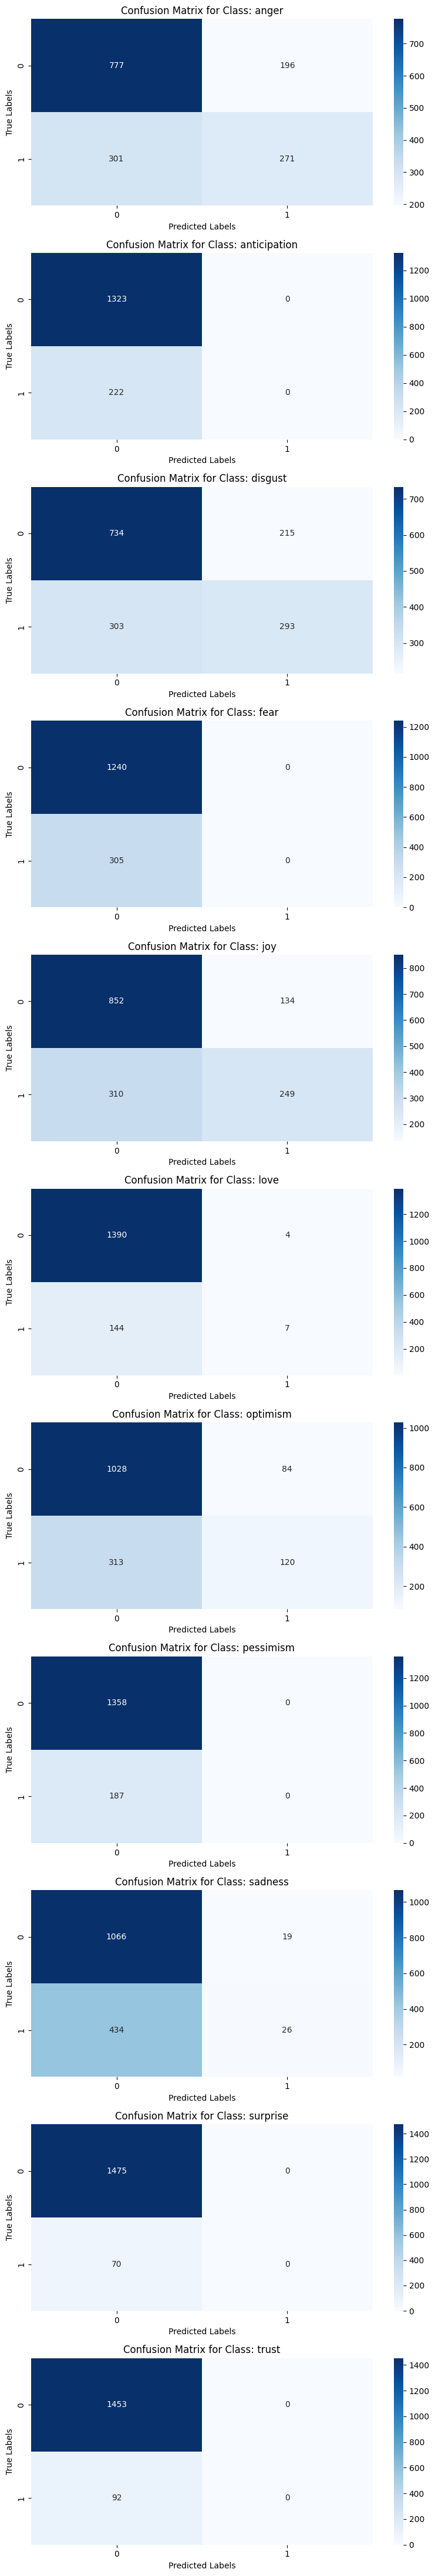

In [64]:
# Plot multilabel confusion matrix
plot_multilabel_confusion_matrix(valid_labels, valid_preds, class_labels=list(my_config.id2label.values()))

In [65]:
# Convert valid_preds and valid_labels to numpy arrays if they are not already
# Log the Confusion Matrix to Wandb
wandb.log({"conf_mat": wandb.plot.confusion_matrix(
    preds=valid_preds.all(axis=1), y_true=valid_labels.all(axis=1),
    class_names=['anger','anticipation','disgust','fear','joy', 'love',
 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'])})

In [66]:
# After training, let us check the best checkpoint
# We need this for Inference
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 450.


In [67]:
wandb.finish()

eval/f1_macro,▃▁▁▁▂▃▄▅▅▆▆▆▇▇▇█████
eval/loss,█▅▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
eval/runtime,▂█▄▅▆▁▂▂▇▂▂▃▂▂█▃▃▂▆▅
eval/samples_per_second,▆▁▅▄▂█▇▇▂▇▇▅▇▆▁▅▅▆▂▃
eval/steps_per_second,▆▁▅▄▂█▇▇▂▇▇▅▇▆▁▅▅▆▂▃
train/epoch,▁▁▁▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇███
train/global_step,▁▁▁▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇████
train/grad_norm,▄▃▁▂▃▄█▇▅
train/learning_rate,█▇▆▅▅▄▃▂▁
train/loss,█▄▃▃▂▂▂▁▁
eval/f1_macro,0.19521


**Performance on Test Set**

In [68]:
# Define the path to the best model checkpoint
# 'model_checkpoint' variable is constructed using the model folder path and the checkpoint step
# This step is identified as having the best model performance during training
model_checkpoint = model_folder/f'checkpoint-{best_model_checkpoint_step}'

In [69]:
# Instantiate the CustomMLP model with predefined configurations
# 'my_config' is an instance of the CustomConfig class, containing specific model settings like
# vocabulary size, embedding dimensions, etc.
model = CustomMLP(my_config)

In [70]:
model

CustomMLP(
  (embedding_bag): EmbeddingBag(8134, 300, mode='mean')
  (layers): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=11, bias=True)
  )
  (sigmoid): Sigmoid()
)

In [71]:
# Load the pre-trained weights into the CustomMLP model from the specified checkpoint
# 'model_checkpoint' refers to the path where the model's best-performing state is saved
# This step ensures the model is initialized with weights from its most effective training state
model = model.from_pretrained(model_checkpoint, config = my_config)

In [72]:
model

CustomMLP(
  (embedding_bag): EmbeddingBag(8134, 300, mode='mean')
  (layers): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=11, bias=True)
  )
  (sigmoid): Sigmoid()
)

In [73]:
# Create a partial function 'collate_fn' using 'collate_batch' with 'my_vocab' set to 'imdb_vocab'
# This function will be used by the Trainer to process batches of data during evaluation
collate_fn = partial(collate_batch, my_vocab=tweet_vocab)

# Configure training arguments for model evaluation
# 'output_dir' specifies where to save the results
# 'per_device_eval_batch_size' sets the batch size for evaluation, adjusted based on available GPU memory
# 'do_train = False' and 'do_eval=True' indicate that training is not performed, but evaluation is
# 'remove_unused_columns=False' ensures that all columns in the dataset are retained during evaluation
# 'report_to=[]' disables logging to external services like Weights & Biases

training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=16,
    do_train=False,
    do_eval=True,
    remove_unused_columns=False,
    report_to=[]
)

In [74]:
# Initialize the Trainer with the specified model and training arguments
# 'model' is the CustomMLP model loaded with pre-trained weights
# 'training_args' contains the configurations for evaluation, including batch sizes and output directory
# 'eval_dataset' is set to 'testset', which is the dataset used for evaluating the model
# 'data_collator' is assigned 'collate_fn', the function for processing batches of data
# 'compute_metrics' is a function that calculates evaluation metrics like accuracy and F1 score

trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=testset,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

In [75]:
trainer.evaluate()

{'eval_loss': 0.3277701437473297,
 'eval_f1_macro': 0.0,
 'eval_runtime': 0.5994,
 'eval_samples_per_second': 5437.002,
 'eval_steps_per_second': 340.334}

In [76]:
test_predictions = trainer.predict(testset)

In [77]:
test_predictions._fields

('predictions', 'label_ids', 'metrics')

In [78]:
test_predictions.metrics

{'test_loss': 0.3277701437473297,
 'test_f1_macro': 0.0,
 'test_runtime': 1.3062,
 'test_samples_per_second': 2495.066,
 'test_steps_per_second': 156.181}

In [79]:
test_predictions.predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
test_predictions.label_ids

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [81]:
# Convert logits to probabilities using sigmoid function
test_probs = torch.sigmoid(torch.tensor(test_predictions.predictions)).numpy()

# No need to manually threshold probabilities
test_preds = test_probs  # No thresholding needed

# Convert labels to numpy array
test_labels = np.array(test_predictions.label_ids)

In [82]:
threshold = 0.5  # Common threshold, but this might be adjusted based on your needs
test_preds = (test_probs > threshold).astype(int)

# predicted_labels now contains a binary matrix indicating the presence or absence of each label per instance

In [83]:
test_preds = np.argmax(test_predictions.predictions, axis=1)
test_labels = np.array(test_predictions.label_ids)

In [84]:
test_preds

array([4, 0, 0, ..., 0, 4, 0])

##  Model Inference

**Step 1. Preprocessing**

In [85]:
sample_X = X_test[5:10]

In [86]:
device = 'cpu'
# Convert the list of texts into a list of lists; each inner list contains the vocabulary indices for a text
list_of_list_of_indices = [tokenizer(text, tweet_vocab) for text in sample_X]

# Compute the offsets for each text in the concatenated tensor
offsets = [0] + [len(i) for i in list_of_list_of_indices]
offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)

# Concatenate all text indices into a single tensor
indices = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])

**Step 2: Get Predictions**

In [87]:
# move model to appropriate device
model.to(device)

# put model in evaluation mode
model.eval()

# get outputs (logits) from model
outputs = model(indices, offsets)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-0.2150, -1.2343, -0.0701, -1.1115, -0.8436, -1.9041, -0.9699, -1.9202,
         -0.9548, -1.9429, -2.2331],
        [-2.7343, -1.0600, -2.9415, -2.8170,  1.8685, -0.3590,  0.6527, -2.9121,
         -2.2369, -2.4264, -2.2488],
        [-0.7591, -1.0054, -0.6070, -1.1757,  0.1121, -1.1889, -0.2998, -1.8525,
         -1.0109, -1.9092, -1.6505],
        [-0.7980, -1.4208, -0.9051, -0.9210, -0.1628, -1.6338, -0.4781, -1.4051,
         -1.0103, -1.5145, -2.4744],
        [-0.3559, -1.3140, -0.2180, -0.7260, -0.7658, -2.2602, -0.5763, -1.5482,
         -0.6269, -2.3368, -2.2604]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

**Step 3: Post Processing**

In [88]:
sample_X

5    @POLITICOEurope Interesting choice of words......
6                   @ananavarro CNN should, for sure 😀
7    Distance yourself once stretched by your frien...
8    Be happy. Be confident. Be kind.\n\n #Kissable...
9    My visit to hospital for care triggered #traum...
Name: Tweet, dtype: object

In [89]:
# get predicted labels
predictions = torch.argmax(outputs.logits, dim = 1)

# mapping for class labels
mapping = model.config.id2label

predicted_label_names = list(map(mapping.get, predictions.tolist()))

print(predicted_label_names)

['disgust', 'joy', 'joy', 'joy', 'disgust']
